### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [1102]:
dfRatings=pd.read_csv('Data.csv')
dfMovies=pd.read_csv('item.csv')
dfUser=pd.read_csv('user.csv')

In [1103]:
dfRatings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [1104]:
dfMovies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [1105]:
dfUser.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [1106]:
print('Ratings Info \n')
print(dfRatings.info())
print('Ratings Shape \n')
print(dfRatings.shape)

dfRatings.describe()

Ratings Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
Ratings Shape 

(100000, 4)


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [1107]:
#pd.DataFrame(dfRatings.isnull().sum()
dfRatings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [1108]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [1109]:
dfMovies.shape

(1681, 22)

In [1110]:
dfMovies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1111]:
dfMovies.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [1112]:
dfUser.info()
print(dfUser.shape)
dfUser.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
(943, 5)


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [1113]:
dfUser.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

# 4. Find the number of movies per genre using the item data - 2.5 marks

In [1114]:
dfMovies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [1115]:
dfTemp=dfMovies.drop(['movie id','movie title','release date'],axis=1)

In [1116]:
dfTemp

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1117]:
def col_sum(column_to_sum):
    return sum(column_to_sum)
dfTemp.apply(col_sum)


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [1118]:
print(dfMovies.shape)
dfMovies=dfMovies[dfMovies['unknown']!=1]
print(dfMovies.shape)
dfMovies[dfMovies['unknown']==1]

(1681, 22)
(1680, 22)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [1119]:
dfTemp=dfMovies.drop(['movie id','release date'],axis=1)
dfTemp['Number of Genre']=dfTemp.sum(axis=1)
dfTemp=dfTemp[dfTemp['Number of Genre']>1]
print('Number of movies with more than one genre: '+ str(dfTemp.shape[0]))
dfTemp.reset_index(inplace=True)
dfTemp[['movie title','Number of Genre']]

Number of movies with more than one genre: 849


,movie title,Number of Genre
0,Toy Story,3
1,GoldenEye,3
2,Get Shorty,3
3,Copycat,3
4,Twelve Monkeys,2
...,...,...
844,MURDER and murder,3
845,Tainted,2
846,Mirage,2
847,B. Monkey,2


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [1120]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [1121]:
dfMovies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [1122]:
dfMovies['Release Year']=pd.to_datetime(dfMovies['release date']).dt.year


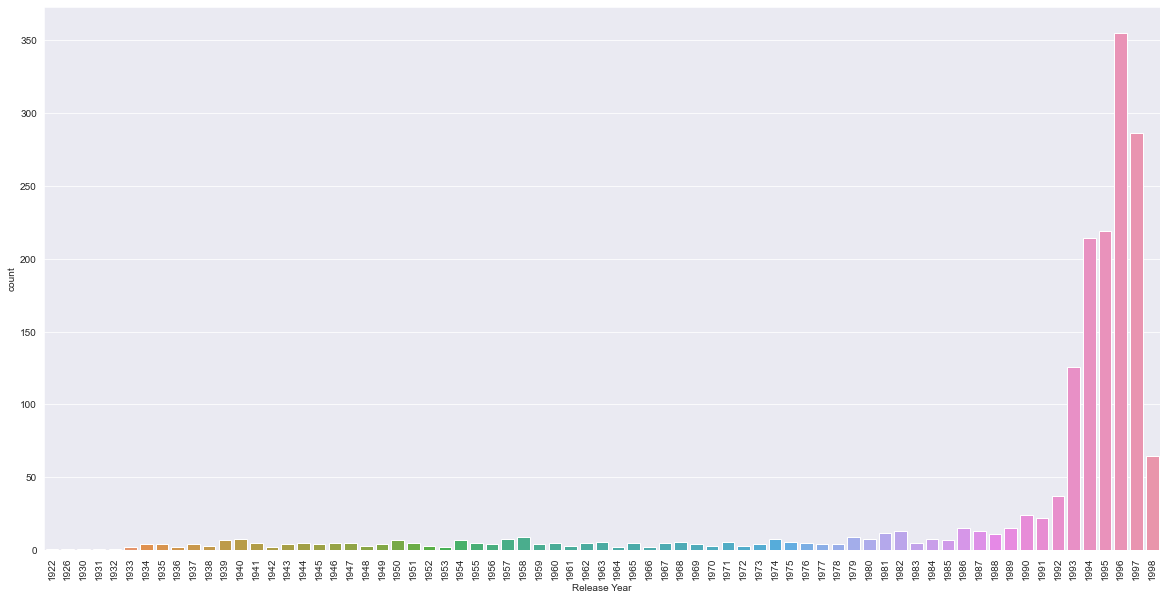

In [1123]:
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=90)
sns.countplot(dfMovies['Release Year']);

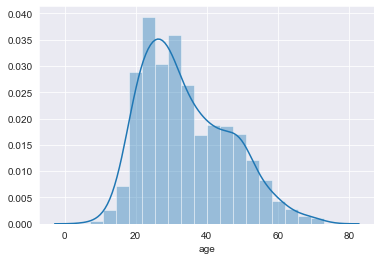

In [1124]:
sns.distplot(dfUser['age']);

In [1125]:
dfUser.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


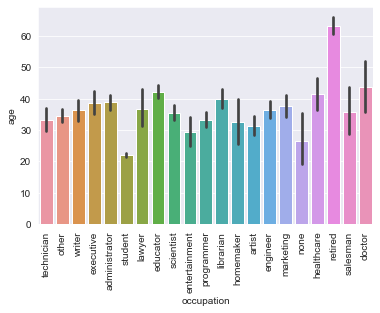

In [1126]:
plt.xticks(rotation=90)
sns.barplot(x='occupation', y='age',data=dfUser);

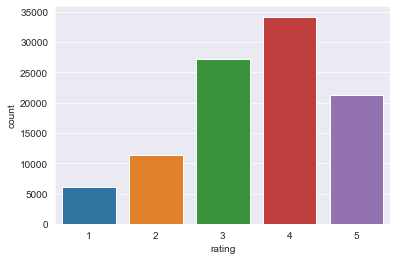

In [1127]:
dfRatings.head()
sns.countplot(dfRatings['rating']);

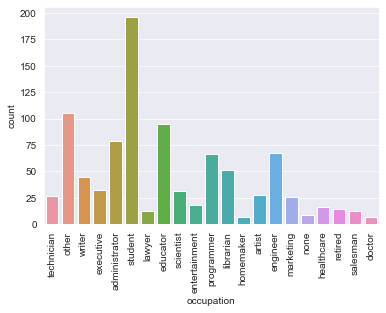

In [1128]:
plt.xticks(rotation=90)
sns.countplot(dfUser['occupation']);

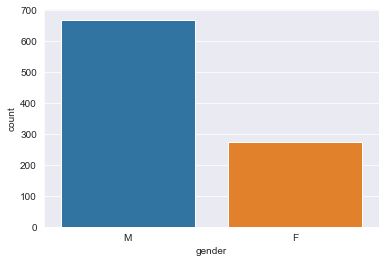

In [1129]:
sns.countplot(dfUser['gender'],);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [1130]:
dfGenre=dfMovies.drop(['movie id','movie title', 'release date', 'unknown'],axis=1)
dfGenre=dfGenre.groupby(by=['Release Year'])[['Action','Adventure','Animation','Childrens','Comedy', 'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum();
dfGenre['Total']=dfGenre.sum(axis=1)
dfGenre.tail(10)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Release Year,,,,,,,,,,,,,,,,,,,
1989,6,4,0,0,3,1,0,8,0,0,0,0,0,1,2,2,2,0,29
1990,7,1,0,1,6,3,2,12,0,1,1,0,0,4,0,4,0,2,44
1991,2,1,1,1,6,0,1,11,1,0,1,2,0,0,4,3,1,0,35
1992,8,1,2,1,12,5,0,14,0,0,6,1,1,7,3,5,2,1,69
1993,20,9,1,6,39,7,4,64,0,1,5,2,6,16,8,17,4,2,211
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,496


In [1131]:
dfGenre=dfGenre.div(dfGenre['Total'], axis= 0) * 100
dfGenre=dfGenre.round(2)

dfGenre.tail(10)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Release Year,,,,,,,,,,,,,,,,,,,
1989,20.69,13.79,0.00,0.00,10.34,3.45,0.00,27.59,0.00,0.00,0.00,0.00,0.00,3.45,6.90,6.90,6.90,0.00,100.0
1990,15.91,2.27,0.00,2.27,13.64,6.82,4.55,27.27,0.00,2.27,2.27,0.00,0.00,9.09,0.00,9.09,0.00,4.55,100.0
1991,5.71,2.86,2.86,2.86,17.14,0.00,2.86,31.43,2.86,0.00,2.86,5.71,0.00,0.00,11.43,8.57,2.86,0.00,100.0
1992,11.59,1.45,2.90,1.45,17.39,7.25,0.00,20.29,0.00,0.00,8.70,1.45,1.45,10.14,4.35,7.25,2.90,1.45,100.0
1993,9.48,4.27,0.47,2.84,18.48,3.32,1.90,30.33,0.00,0.47,2.37,0.95,2.84,7.58,3.79,8.06,1.90,0.95,100.0
1994,8.50,3.68,1.13,4.25,23.23,2.27,2.55,27.48,0.85,0.00,2.27,0.57,0.57,9.92,1.98,7.08,1.98,1.70,100.0
1995,10.50,5.77,1.57,5.51,16.54,2.89,1.31,23.36,0.79,0.26,3.67,0.79,1.31,9.71,3.94,10.24,1.31,0.52,100.0
1996,7.87,4.29,1.61,3.76,19.32,3.76,3.22,30.41,1.07,0.18,1.97,1.61,1.07,6.80,2.68,8.41,1.61,0.36,100.0
1997,9.27,4.03,0.60,4.44,17.54,6.05,1.21,22.78,0.81,0.40,1.61,1.01,3.63,10.28,2.62,10.89,2.82,0.00,100.0


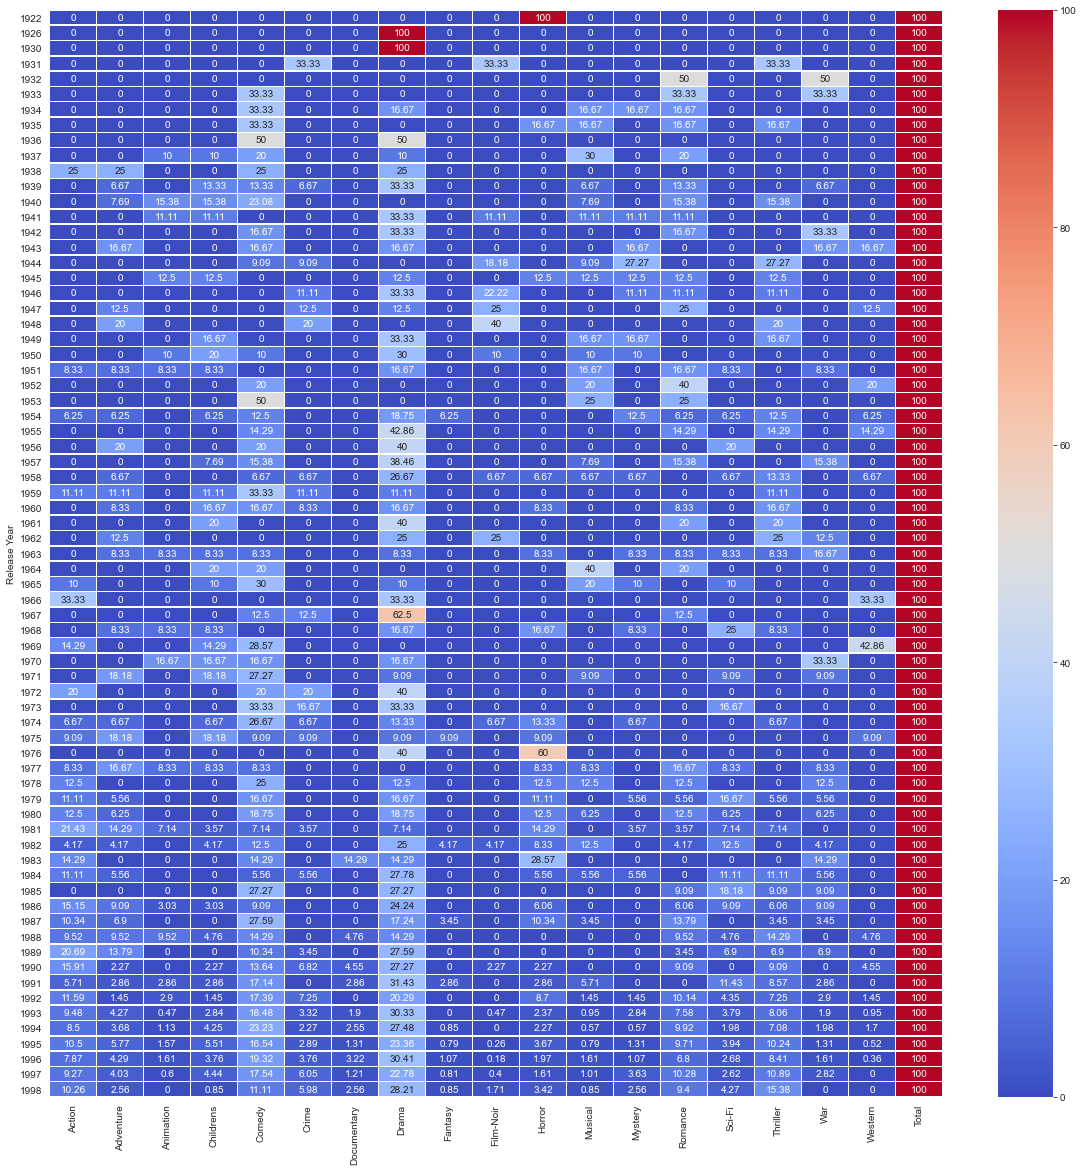

In [1132]:
plt.figure(figsize=(20,20)) 
plt.xticks(rotation=90)
#sns.barplot(x='Release Year',y=[['Action','Comedy']],data=dfGenre);
#dfGenre.plot(x='Release Year', y=['Action','Animation'], kind='bar',figsize=(20,10));
sns.heatmap(dfGenre, linewidths=.5, annot=True,fmt='g',cmap='coolwarm');

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [1133]:
dfMovieList=dfMovies[['movie id','movie title']]
dfMovieList.head()

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat


In [1134]:
print(dfRatings.shape)
print(dfMovieList.shape)

(100000, 4)
(1680, 2)


In [1135]:
dfMyList= pd.merge(dfMovieList,dfRatings,how='inner', on='movie id')

print(dfMyList.shape)
dfMyList=dfMyList.drop(['movie id','user id','timestamp'],axis=1)
print(dfMyList.shape)


(99990, 5)
(99990, 2)


In [1136]:
dfMyList=(dfMyList.groupby('movie title')['rating'].agg(('count','mean')))
print(dfMyList.shape)

(1657, 2)


In [1137]:
dfMyList=dfMyList[dfMyList['count']>100].sort_values('mean',ascending=False).reset_index().round(2)
print(dfMyList.shape)
dfMyList.head(25)

(334, 3)


,movie title,count,mean
0,"Close Shave, A",112,4.49
1,Schindler's List,298,4.47
2,"Wrong Trousers, The",118,4.47
3,Casablanca,243,4.46
4,"Shawshank Redemption, The",283,4.45
5,Rear Window,209,4.39
6,"Usual Suspects, The",267,4.39
7,Star Wars,583,4.36
8,12 Angry Men,125,4.34
9,Citizen Kane,198,4.29


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [1138]:
dfMyList= pd.merge(dfRatings,dfMovies,how='inner', on='movie id')
dfMyList.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release Year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997


In [1139]:
print(dfMyList.shape)
dfMyList= pd.merge(dfMyList,dfUser,how='inner', on='user id')
print(dfMyList.shape)
dfMyList=dfMyList[['Drama','Sci-Fi','Romance','gender']]
dfMyList.head()

(99990, 26)
(99990, 30)


,Drama,Sci-Fi,Romance,gender
0,0,0,0,M
1,0,1,0,M
2,0,0,1,M
3,0,0,0,M
4,1,0,0,M


In [1140]:
print(dfMyList['gender'].value_counts()['M'])
print(dfMyList['gender'].value_counts()['F'])
dfTemp=dfMyList.groupby(by='gender').sum()
dfTemp['Total']=[dfMyList['gender'].value_counts()['F'],dfMyList['gender'].value_counts()['M']]
dfTemp

74252
25738


,Drama,Sci-Fi,Romance,Total
gender,,,,
F,11008,2629,5858,25738
M,28887,10101,13603,74252


In [1141]:
dfTemp.div(dfTemp['Total'],axis=0).multiply(100).round(2)

,Drama,Sci-Fi,Romance,Total
gender,,,,
F,42.77,10.21,22.76,100.0
M,38.90,13.60,18.32,100.0


This analysis is only based on the assumption stated in the question. "Use number of ratings to validate the numbers". 
Notably since there is no indication whether is a high correlation between people (male/female) actually watching and then going ahead and providing ratings as well. 

Statement: Men watch more drama than women - False
Statement: Women watch more Sci-Fi than men - False
Statement: Men watch more Romance than women - False